# ISLR Chapter 9 - End of Chapter Applied exercises code portion solutions¶

Exercises from: "An Introduction to Statistical Learning with Applications in R" (Springer, 2013) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Data: http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Code Solutions by Arthur Avila

### 4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

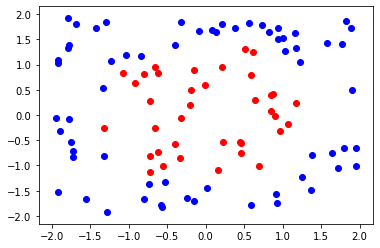

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(11)
X = np.random.uniform(-2,2,(100,2))
e = np.random.normal(0, 0.1, 100)
y = (X[:,0]**2+X[:,1]**2+e>2)+1

plt.scatter(X[y==1,0], X[y==1,1], c='red')
plt.scatter(X[y==2,0], X[y==2,1], c='blue')
plt.show()

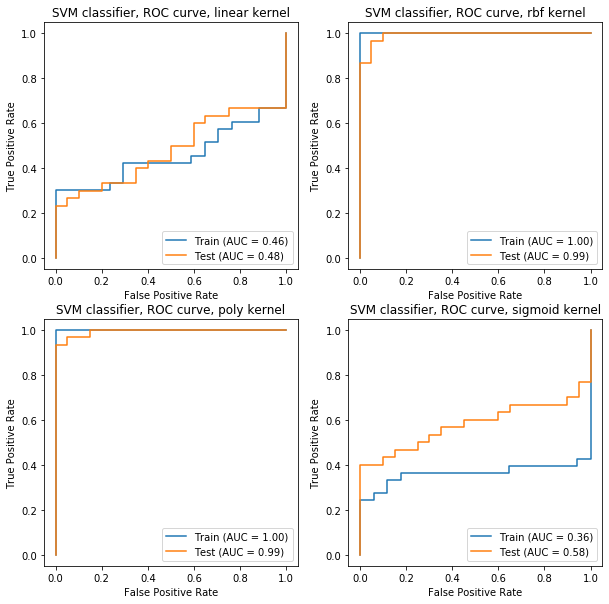

In [2]:
from sklearn.svm import SVC 
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

np.random.seed(22)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

kernel = ('linear', 'rbf', 'poly', 'sigmoid')

fig, axs = plt.subplots(2,2, figsize=(10,10))

models = []

for i,k in zip(axs.ravel(),kernel):
    model = SVC(kernel=k, gamma='auto', degree=2)
    model.fit(X_train, y_train)
    models.append(model)
    plot_roc_curve(model, X_train, y_train, name='Train', ax=i)
    plot_roc_curve(model, X_test, y_test, name='Test', ax=i)
    i.set_title(f'SVM classifier, ROC curve, {k} kernel')

plt.show()

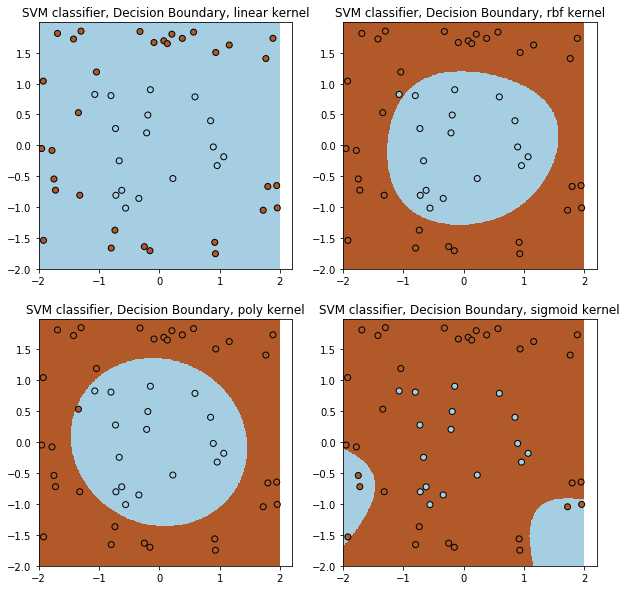

In [3]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

xx, yy = np.meshgrid(np.arange(-2, 2, 0.01), np.arange(-2, 2, 0.01))

for i,k,model in zip(axs.ravel(),kernel,models):
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    i.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
    i.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap=plt.cm.Paired, edgecolors='black')
    i.set_title(f'SVM classifier, Decision Boundary, {k} kernel')

plt.show()

### 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

#### (a) Generate a data set with $n$ = 500 and $p$ = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:
```
> x1 = runif (500) -0.5
> x2 = runif (500) -0.5
> y =1*( x1 ^2 - x2 ^2 > 0)
```

#### (b) Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the $x$-axis, and $X_2$ on the $y$-axis.

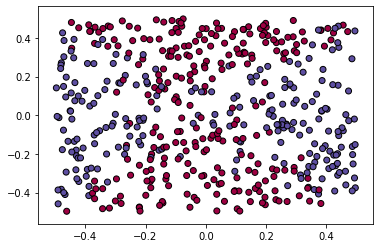

In [4]:
np.random.seed(11)
X = np.random.uniform(-.5,.5,(500,2))
e = np.random.normal(0,0.05,500)
y = (X[:,0]**2-X[:,1]**2+e>0)+1
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Spectral, edgecolors='black')
plt.show()

#### (c) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.

#### (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

#### (e) Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_1^2$ , $X_1 \times X_2$ , $\log(X_2)$, and so forth).

#### (f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

#### (g) Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

#### (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

#### (i) Comment on your results.

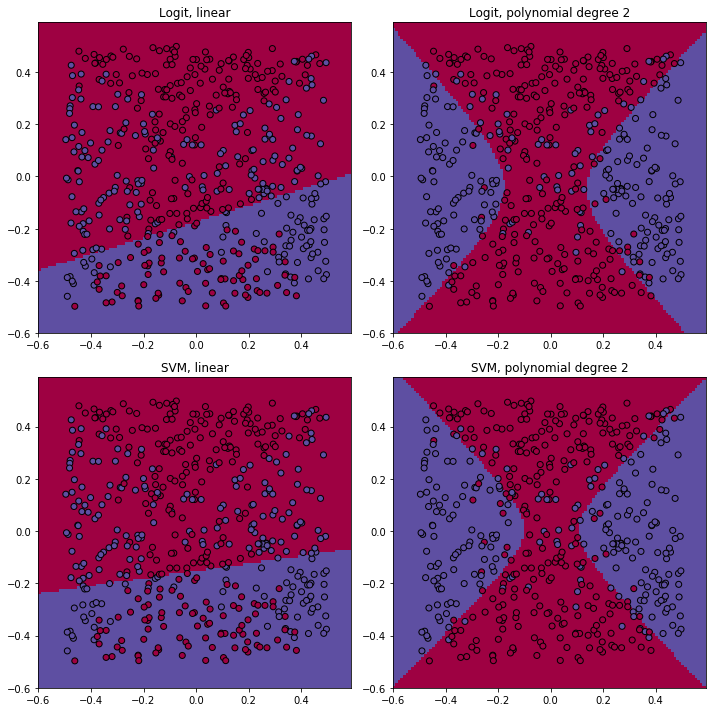

Results are very similar


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

fig, axs = plt.subplots(2,2, figsize=(10,10))
ax1, ax2, ax3, ax4 = axs.ravel()

clf = LogisticRegression()
clf.fit(X,y)
xx, yy = np.meshgrid(np.arange(-.6, .6, 0.01), np.arange(-.6, .6, 0.01))
z = np.c_[xx.ravel(),yy.ravel()]
Z = clf.predict(z).reshape(xx.shape)

_ = ax1.pcolormesh(xx,yy,Z,cmap=plt.cm.Spectral)
_ = ax1.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Spectral, edgecolors='black')
_ = ax1.set_title('Logit, linear')

poly = PolynomialFeatures(2)
XX = poly.fit_transform(X)
clf.fit(XX,y)
zz = poly.fit_transform(z)
Z = clf.predict(zz).reshape(xx.shape)

_ = ax2.pcolormesh(xx,yy,Z,cmap=plt.cm.Spectral)
_ = ax2.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Spectral, edgecolors='black')
_ = ax2.set_title('Logit, polynomial degree 2')

clf = SVC(kernel='linear')
clf.fit(X,y)
Z = clf.predict(z).reshape(xx.shape)

_ = ax3.pcolormesh(xx,yy,Z,cmap=plt.cm.Spectral)
_ = ax3.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Spectral, edgecolors='black')
_ = ax3.set_title('SVM, linear')

clf = SVC(kernel='poly', degree=2)
clf.fit(X,y)
Z = clf.predict(z).reshape(xx.shape)

_ = ax4.pcolormesh(xx,yy,Z,cmap=plt.cm.Spectral)
_ = ax4.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Spectral, edgecolors='black')
_ = ax4.set_title('SVM, polynomial degree 2')

plt.tight_layout()
plt.show()

print('Results are very similar')

### 6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now investigate this claim.

#### (a) Generate two-class data with $p = 2$ in such a way that the classes are just barely linearly separable.

#### (b) Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how does this relate to the cross-validation errors obtained?

#### (c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?

#### (d) Discuss your results.

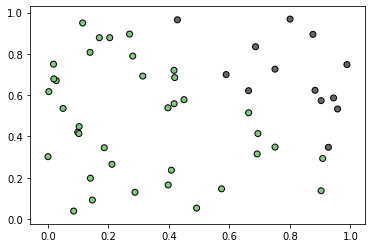

In [6]:
np.random.seed(1)
n=25
X = np.random.uniform(0,1,(n*2,2))
y = (X[:,0]+X[:,1]>1.25)+1
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Accent, edgecolors='black')
plt.show()

In [7]:
cost = (0.01, 0.05, .1, .5, 1, 2)


for ax,C in zip(axs.ravel(),cost):
    clf = SVC(C=C, kernel='linear')
    clf.fit(X[:n,:],y[:n])
    train_acc = clf.score(X[:n,:],y[:n])
    test_acc = clf.score(X[n:,:],y[n:])
    print(f'''
          For the cost parameter {C} 
          the fitted accuracy is {train_acc} 
          and the test accuracy is {test_acc}.''')



          For the cost parameter 0.01 
          the fitted accuracy is 0.8 
          and the test accuracy is 0.68.

          For the cost parameter 0.05 
          the fitted accuracy is 0.8 
          and the test accuracy is 0.68.

          For the cost parameter 0.1 
          the fitted accuracy is 0.8 
          and the test accuracy is 0.68.

          For the cost parameter 0.5 
          the fitted accuracy is 0.8 
          and the test accuracy is 0.68.


### 7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

#### (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

#### (b) Fit a support vector classifier to the data with various values of `cost` , in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

#### (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of `gamma` and `degree` and `cost` . Comment on your results.

#### (d) Make some plots to back up your assertions in (b) and (c).

Hint: In the lab, we used the `plot()` function for svm objects only in cases with $p = 2$. When $p > 2$, you can use the `plot()` function to create plots displaying pairs of variables at a time. Essentially, instead of typing
```
> plot(svmfit , dat)
```
where `svmfit` contains your fitted model and `dat` is a data frame containing your data, you can type
```
> plot(svmfit, dat, x1∼x4)
```
in order to plot just the first and fourth variables. However, you must replace `x1` and `x4` with the correct variable names. To find out more, type `?plot.svm`.

In [8]:
auto = pd.read_table('Auto.data', delim_whitespace=True, na_values='?', index_col=['name'])
auto = auto.dropna()
#auto['cylinders'] = auto['cylinders'].astype('category')
#auto['origin'] = auto['origin'].astype('category')

y = auto.mpg > np.median(auto.mpg)
X = pd.get_dummies(auto.drop('mpg', axis=1), drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 7 columns):
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
dtypes: float64(4), int64(3)
memory usage: 24.5+ KB


In [9]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV

params = {'C':(0.01, 0.05, 0.1, 0.5, 1, 2, 3),
          'gamma':(0.5,1,2),
          'kernel':('linear','rbf')}
clf = GridSearchCV(SVC(),params, return_train_score=True, n_jobs=-1, verbose=1)
clf.fit(X,y)

clf_results = pd.DataFrame(clf.cv_results_)
print(clf_results.info())

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.3s


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 23 columns):
mean_fit_time         42 non-null float64
std_fit_time          42 non-null float64
mean_score_time       42 non-null float64
std_score_time        42 non-null float64
param_C               42 non-null object
param_gamma           42 non-null object
param_kernel          42 non-null object
params                42 non-null object
split0_test_score     42 non-null float64
split1_test_score     42 non-null float64
split2_test_score     42 non-null float64
split3_test_score     42 non-null float64
split4_test_score     42 non-null float64
mean_test_score       42 non-null float64
std_test_score        42 non-null float64
rank_test_score       42 non-null int32
split0_train_score    42 non-null float64
split1_train_score    42 non-null float64
split2_train_score    42 non-null float64
split3_train_score    42 non-null float64
split4_train_score    42 non-null float64
mean_train_score     

[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   47.8s finished


The best parameters were kernel linear, cost 0.010, and gamma 0.5.
Polynomial fit seems to have issues with this data set


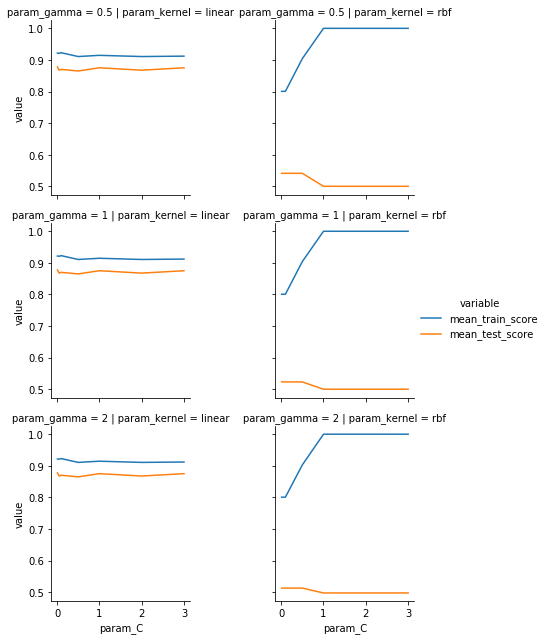

In [10]:
best = clf.best_params_
print('The best parameters were kernel %s, cost %.3f, and gamma %.1f.' 
      % (best['kernel'], best['C'], best['gamma']))
print('Polynomial fit seems to have issues with this data set')

plot_data = clf_results.melt(['param_C', 'param_gamma', 'param_kernel'],
                             ['mean_train_score','mean_test_score'])
g = sns.FacetGrid(plot_data, 'param_gamma', 'param_kernel', 'variable', legend_out=True)
g = g.map_dataframe(sns.lineplot, 'param_C','value', estimator=None)
plt.tight_layout()
g.add_legend()
plt.show()


### 8. This problem involves the `OJ` data set which is part of the `ISLR` package.

#### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

#### (b) Fit a support vector classifier to the training data using `cost=0.01` , with Purchase as the response and the other variables as predictors. Use the `summary()` function to produce summary statistics, and describe the results obtained.

#### (c) What are the training and test error rates?

#### (d) Use the `tune()` function to select an optimal `cost`. Consider values in the range 0.01 to 10.

#### (e) Compute the training and test error rates using this new value for `cost`.

#### (f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for `gamma`.

#### (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set `degree=2`.

#### (h) Overall, which approach seems to give the best results on this data?

In [11]:
OJ = pd.read_csv('OJ.csv', index_col=0)
OJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1 to 1070
Data columns (total 18 columns):
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(5), object(2)
memory usage: 158.8+ KB


In [19]:
y = OJ.Purchase
X = pd.get_dummies(OJ.drop('Purchase', axis=1), drop_first=True)
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800)

clf = SVC(kernel='linear', C=.01)
clf.fit(X_train, y_train)
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print('Linear kernel with cost 0.01.')
print('The training accuracy is %.3f and the test accuracy is %3.f' % (train_acc, test_acc))

params = {'kernel':('linear', 'poly', 'rbf'),
          'C':(0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

clf = GridSearchCV(SVC(degree=2), params, return_train_score=True, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Linear kernel with cost 0.01.
The training accuracy is 0.767 and the test accuracy is   1
Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    2.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=2,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [20]:
best = clf.best_params_
print('The best parameters were kernel %s and cost %.3f.' % (best['kernel'], best['C']))
print('The best score in cross validation was %.3f.' % clf.best_score_)
print('The model accuracy on the training data is %.3f.' % clf.score(X_train,y_train))
print('The model accuracy on the test data is %.3f.' % clf.score(X_test,y_test))

The best parameters were kernel linear and cost 1.000.
The best score in cross validation was 0.830.
The model accuracy on the training data is 0.835.
The model accuracy on the test data is 0.826.
